# Salary project

This is an exploratory analysis of the Salaries dataset from github. 
Here are some of the questions I try to address in my analysis below:

What do the distributions of the variables in this dataset look like?

What variables in the dataset can be used to predict the salary for a faculty member?



# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [2]:
df=pd.read_csv('Salary_Project.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.shape

(397, 6)

In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# No Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# variables

In total, there are 397 observations and 6 variables.

Let’s first take a look at the 3 qualitative variables in the dataset: rank, discipline, and sex.

# Visualization of the Data

For nominal categorical data, we use countplot for visualization

In [7]:
df_nominal=df[['rank','discipline','sex']].copy()

In [8]:
df_nominal.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


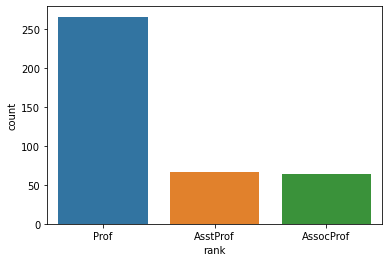

In [9]:
ax=sns.countplot(x='rank',data=df_nominal)
print(df_nominal['rank'].value_counts())

Majority of the data come from Professors = 266 and less data for Assistant Professors = 67 and Associate Professors = 64

B    216
A    181
Name: discipline, dtype: int64


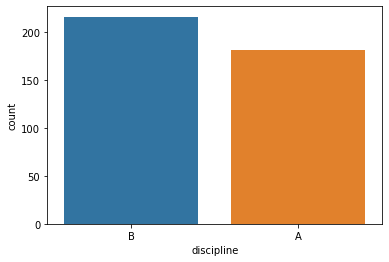

In [10]:
ax=sns.countplot(x='discipline',data=df_nominal)
print(df_nominal['discipline'].value_counts())

Fewer faculty members in the dataset work under "A" department compared to to the "B” departments (coded as B under discipline).

Male      358
Female     39
Name: sex, dtype: int64


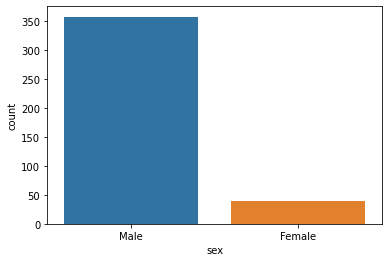

In [11]:
ax=sns.countplot(x='sex',data=df_nominal)
print(df_nominal['sex'].value_counts())

Male faculty members represented in the dataset = 358 are a lot more compared to female faculty members = 39.

For the ordinal categorical data we use catplot and lineplot as it will give the flow of other variables

In [12]:
df_ordinal=df[['yrs.since.phd','yrs.service']].copy()
df_ordinal

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


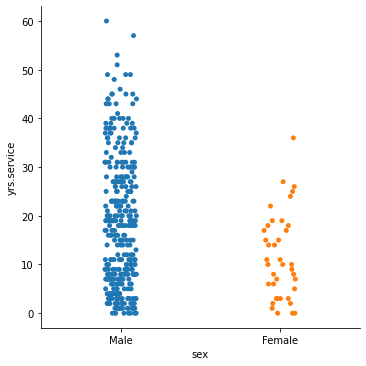

In [13]:
sns.catplot(x='sex',y='yrs.service',data=df)

Years of services against gender shows that a few of the male faculty members have experience more than 50 years while females have less years of experience.

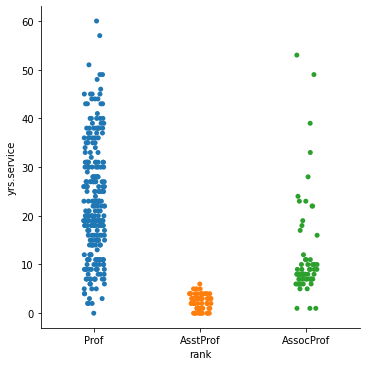

In [14]:
sns.catplot(x='rank',y='yrs.service',data=df)

Above graph shows that years of service and rank have some relation between them. It can be more clearer when we check corelation. 

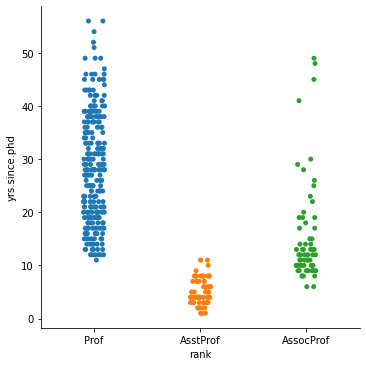

In [15]:
sns.catplot(x='rank',y='yrs.since.phd',data=df)

This figure shows that the highest rank "professor" have minimum 10 years since phd. "Associate professor" are atleast 8 years since phd and Asst prof are from 0 to 10 years since phd. There is a strong relation between years since phd and rank

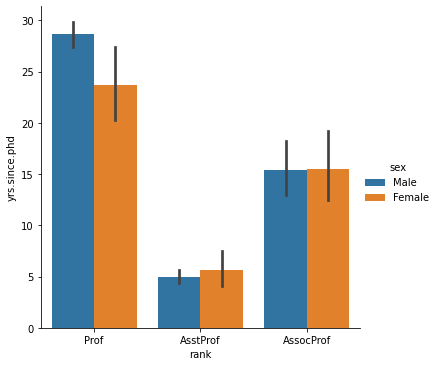

In [16]:
g=sns.catplot(x='rank',y='yrs.since.phd',hue='sex',data=df,kind='bar')

plt.show()

This figure shows the rank based on thier gender and years since phd. 

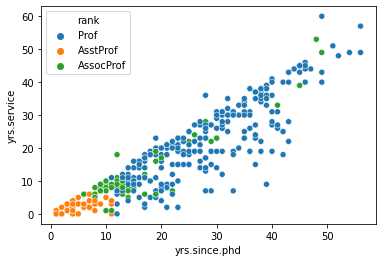

In [17]:
sns.scatterplot(y='yrs.service',x='yrs.since.phd',hue='rank',data=df)

plt.show()

Above figure shows that there Associate professors with 50 years of experience and 50 years since phd. This might be an outlier or true value. Wecan find by checking outliers.

<AxesSubplot:xlabel='salary', ylabel='Density'>

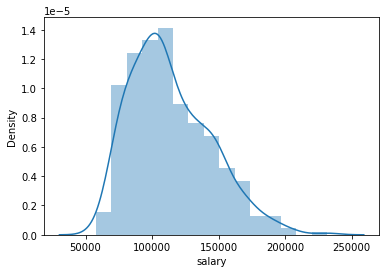

In [18]:
sns.distplot(df['salary'],kde=True)

the distribution of Salary is somewhat normalised.

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

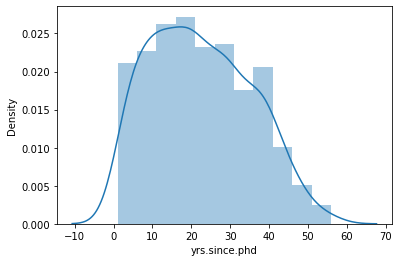

In [19]:
sns.distplot(df['yrs.since.phd'],kde=True)

<AxesSubplot:xlabel='count', ylabel='rank'>

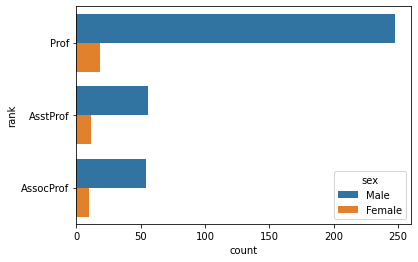

In [20]:
sns.countplot(y='rank',hue='sex',data=df,)

above figure shows the count of each rank based on thier sex.

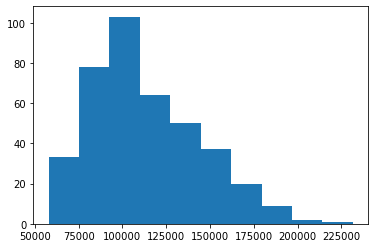

In [21]:
#Univariate analysis

plt.hist(df['salary'])
plt.show()

It shows that majority of faculties have salary in the range of 90,000 to 110,000.

Starting salary of Faculty members are around 57,000.

Max Salary is around 230,000 and only minimal number of faculty draws the max salary.

# Encoding the object type values to float type

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [23]:
s=df['salary'].unique()
s

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

In [24]:
from collections import Counter

input =  df['salary']
c = Counter( input )

print( c.items() )


dict_items([(139750, 1), (173200, 1), (79750, 1), (115000, 1), (141500, 1), (97000, 1), (175000, 1), (147765, 1), (119250, 1), (129000, 1), (119800, 1), (79800, 1), (77700, 1), (78000, 1), (104800, 2), (117150, 1), (101000, 3), (103450, 1), (124750, 1), (137000, 1), (89565, 1), (102580, 1), (93904, 1), (113068, 1), (74830, 1), (106294, 1), (134885, 1), (82379, 1), (77000, 2), (118223, 1), (132261, 1), (79916, 1), (117256, 1), (80225, 2), (155750, 1), (86373, 1), (125196, 1), (100938, 1), (146500, 1), (93418, 1), (101299, 1), (231545, 1), (94384, 1), (114778, 1), (98193, 1), (151768, 1), (140096, 1), (70768, 1), (126621, 1), (108875, 1), (74692, 1), (106639, 1), (103760, 1), (83900, 1), (117704, 1), (90215, 1), (100135, 1), (75044, 1), (90304, 1), (75243, 1), (109785, 1), (103613, 1), (68404, 1), (100522, 1), (99418, 1), (111512, 1), (91412, 1), (126320, 1), (146856, 1), (100131, 1), (92391, 1), (113398, 1), (73266, 1), (150480, 1), (193000, 1), (86100, 1), (84240, 1), (150743, 1), (135

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


In [26]:
df.shape

(397, 6)

# Describing the Data

In [27]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


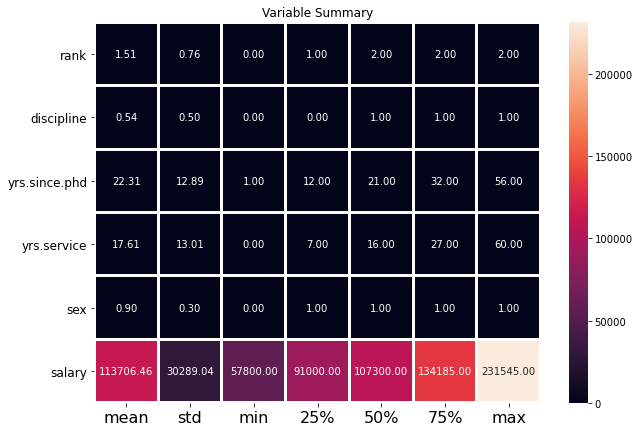

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='0.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

In the above figure, we can see that salary is much higher from other variables. We can use Scaler to scale the Salary column

# Correlation

<AxesSubplot:>

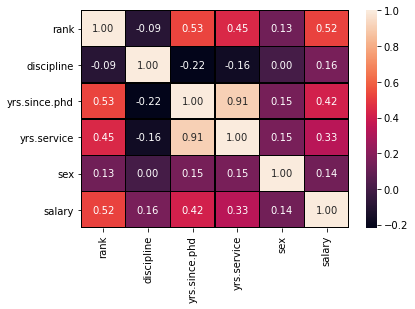

In [29]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In the above figure, we can see the correlation between Salary and other variables are not much. The max correlation is with rank 52%. Then we have Years since phd 42% and the next is years of service 33%. The least corelated is sex 14%.

There is a Strong correlation between Years since Phd and Years of service of 91%.

The correlation between Years since phd and rank is 53%.

The correlation between Years of service and rank is 45%.

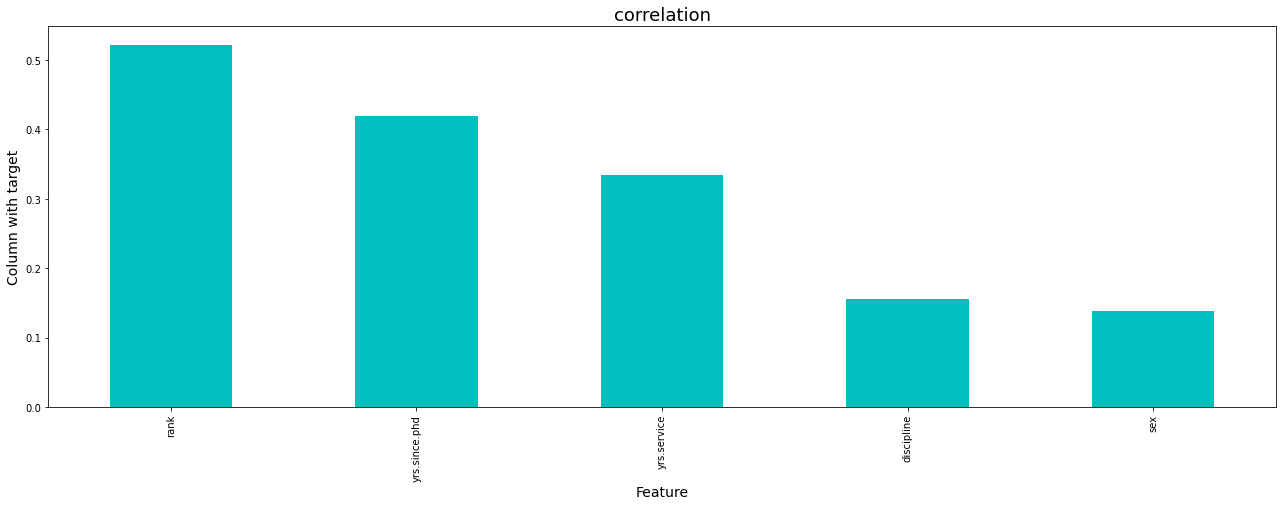

In [30]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

All the values are positive

In [31]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

at threshold=+/-0.50, skewness is present in
rank

years service

sex

salary

Since most of the skewness is present in object type variables, we can ignore skewness for now

# Outliers checking

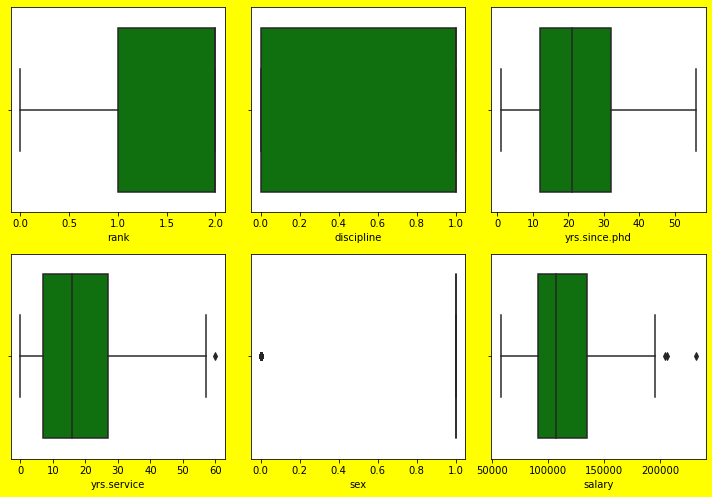

In [32]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in df:

    plt.subplot(3,3,graph)

    sns.boxplot(df[column],color='green',orient='v')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

We have outliers in Yrs service, Sex and salary

In [33]:
df['sex'].unique()

#since sex is nominal type, we cannot consider it as an outlier

array([1., 0.])

# Outlier removal

In [34]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z.shape

(397, 6)

In [35]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364]), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5]))


In [36]:
#The first array contains the list of row numbers and second array respective column numbers
#which mean z[9][4] have a Z-score higher than 3.

df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500


As per the dataframe, column 4 is sex variable and removing outliers from categorical column alter our model drastically. so we can use manual removal of outliers using drop function. Since the outliers in this dataframe is minimal, we can remove manually 

In [37]:
print(z[43][5])
print(z[131][3])
print(z[330][3])
print(z[364][5])

3.8953773005457175
3.0320633540256257
3.263016759925122
3.034410248101501


Accordingly these 4 columns are having outliers as zscore is more than 3. we can drop these rows using drop. attached screenshot of creating a df of continuous variables and checking outliers.

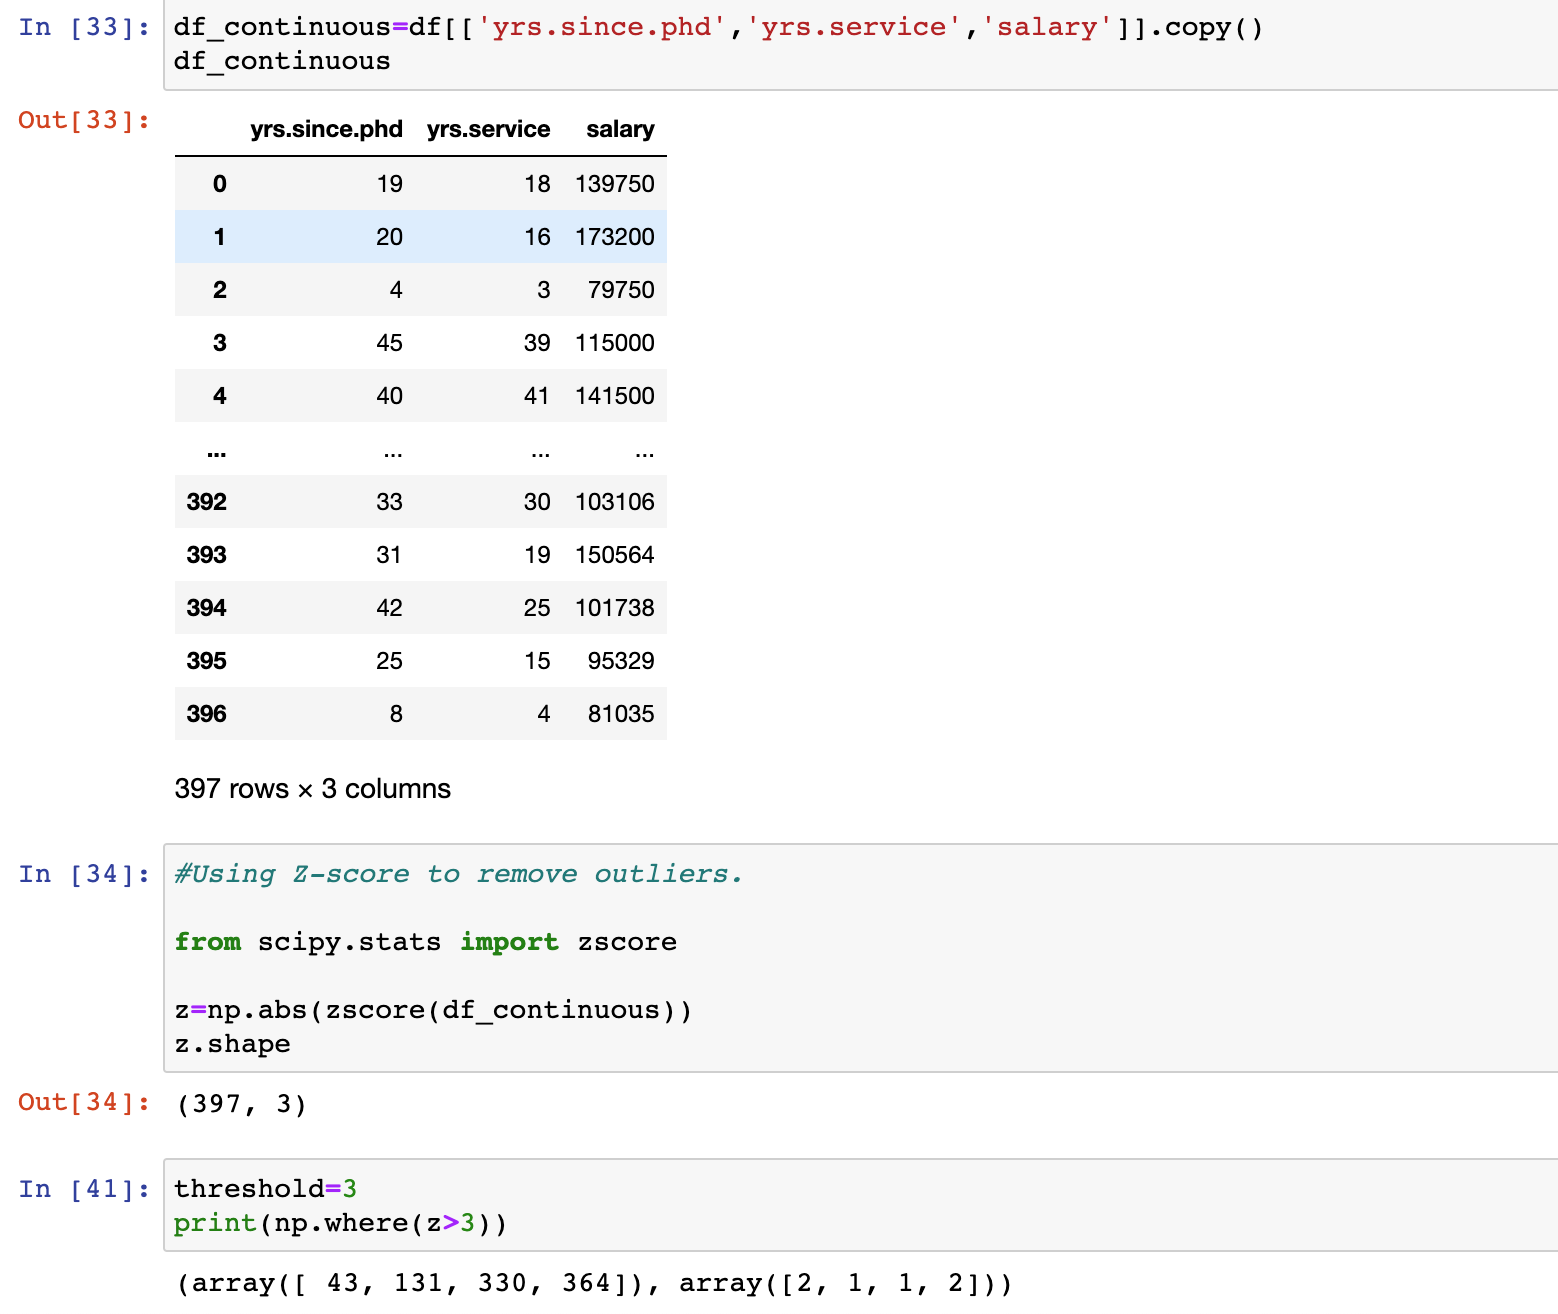

In [38]:
df.drop([43, 131, 330, 364], axis=0, inplace=True)
df.shape

(393, 6)

# Scaling the data

In [39]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()

mms_df = mms.fit_transform(df)

mms_df

array([[1.        , 1.        , 0.32727273, 0.33962264, 1.        ,
        0.56053352],
       [1.        , 1.        , 0.34545455, 0.30188679, 1.        ,
        0.78932969],
       [0.5       , 1.        , 0.05454545, 0.05660377, 1.        ,
        0.1501368 ],
       ...,
       [1.        , 0.        , 0.74545455, 0.47169811, 1.        ,
        0.30053352],
       [1.        , 0.        , 0.43636364, 0.28301887, 1.        ,
        0.25669631],
       [0.5       , 0.        , 0.12727273, 0.0754717 , 1.        ,
        0.15892613]])

In [40]:
New_DF = pd.DataFrame(mms_df, columns=['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'])
New_DF

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1.0,1.0,0.327273,0.339623,1.0,0.560534
1,1.0,1.0,0.345455,0.301887,1.0,0.789330
2,0.5,1.0,0.054545,0.056604,1.0,0.150137
3,1.0,1.0,0.800000,0.735849,1.0,0.391245
4,1.0,1.0,0.709091,0.773585,1.0,0.572503
...,...,...,...,...,...,...
388,1.0,0.0,0.581818,0.566038,1.0,0.309891
389,1.0,0.0,0.545455,0.358491,1.0,0.634501
390,1.0,0.0,0.745455,0.471698,1.0,0.300534
391,1.0,0.0,0.436364,0.283019,1.0,0.256696


In [41]:
x=New_DF.iloc[:,0:-1]
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,1.0,1.0,0.327273,0.339623,1.0
1,1.0,1.0,0.345455,0.301887,1.0
2,0.5,1.0,0.054545,0.056604,1.0
3,1.0,1.0,0.800000,0.735849,1.0
4,1.0,1.0,0.709091,0.773585,1.0
...,...,...,...,...,...
388,1.0,0.0,0.581818,0.566038,1.0
389,1.0,0.0,0.545455,0.358491,1.0
390,1.0,0.0,0.745455,0.471698,1.0
391,1.0,0.0,0.436364,0.283019,1.0


In [42]:
y=New_DF.iloc[:,-1]
y

0      0.560534
1      0.789330
2      0.150137
3      0.391245
4      0.572503
         ...   
388    0.309891
389    0.634501
390    0.300534
391    0.256696
392    0.158926
Name: salary, Length: 393, dtype: float64

In [43]:
lm=LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error,r2_score

In [45]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print("\n")

At random state 0,the training accuracy is: 0.3809309402638894
At random state 0,the testing accuracy is: 0.39391503126147676


At random state 1,the training accuracy is: 0.3464998557627128
At random state 1,the testing accuracy is: 0.5008726385816057


At random state 2,the training accuracy is: 0.3723356448531042
At random state 2,the testing accuracy is: 0.43709366225117063


At random state 3,the training accuracy is: 0.39572769036039446
At random state 3,the testing accuracy is: 0.3336856771429638


At random state 4,the training accuracy is: 0.41522475532377856
At random state 4,the testing accuracy is: 0.24889655647599107


At random state 5,the training accuracy is: 0.3743970659062349
At random state 5,the testing accuracy is: 0.39858132492536447


At random state 6,the training accuracy is: 0.41655890693315467
At random state 6,the testing accuracy is: 0.264665969546223


At random state 7,the training accuracy is: 0.3793253517436994
At random state 7,the testing accuracy is:

At random state 65,the training accuracy is: 0.3745438855025859
At random state 65,the testing accuracy is: 0.4143287503010675


At random state 66,the training accuracy is: 0.36049717613451726
At random state 66,the testing accuracy is: 0.4611986073158306


At random state 67,the training accuracy is: 0.39719055054198393
At random state 67,the testing accuracy is: 0.3197213455825185


At random state 68,the training accuracy is: 0.41651209442850146
At random state 68,the testing accuracy is: 0.26599686685679313


At random state 69,the training accuracy is: 0.38595858528183435
At random state 69,the testing accuracy is: 0.37371497400397324


At random state 70,the training accuracy is: 0.4101864043439195
At random state 70,the testing accuracy is: 0.2990794863151266


At random state 71,the training accuracy is: 0.4065766926865798
At random state 71,the testing accuracy is: 0.30345235842471796


At random state 72,the training accuracy is: 0.41014748369321485
At random state 72,the te

# Unscaled data

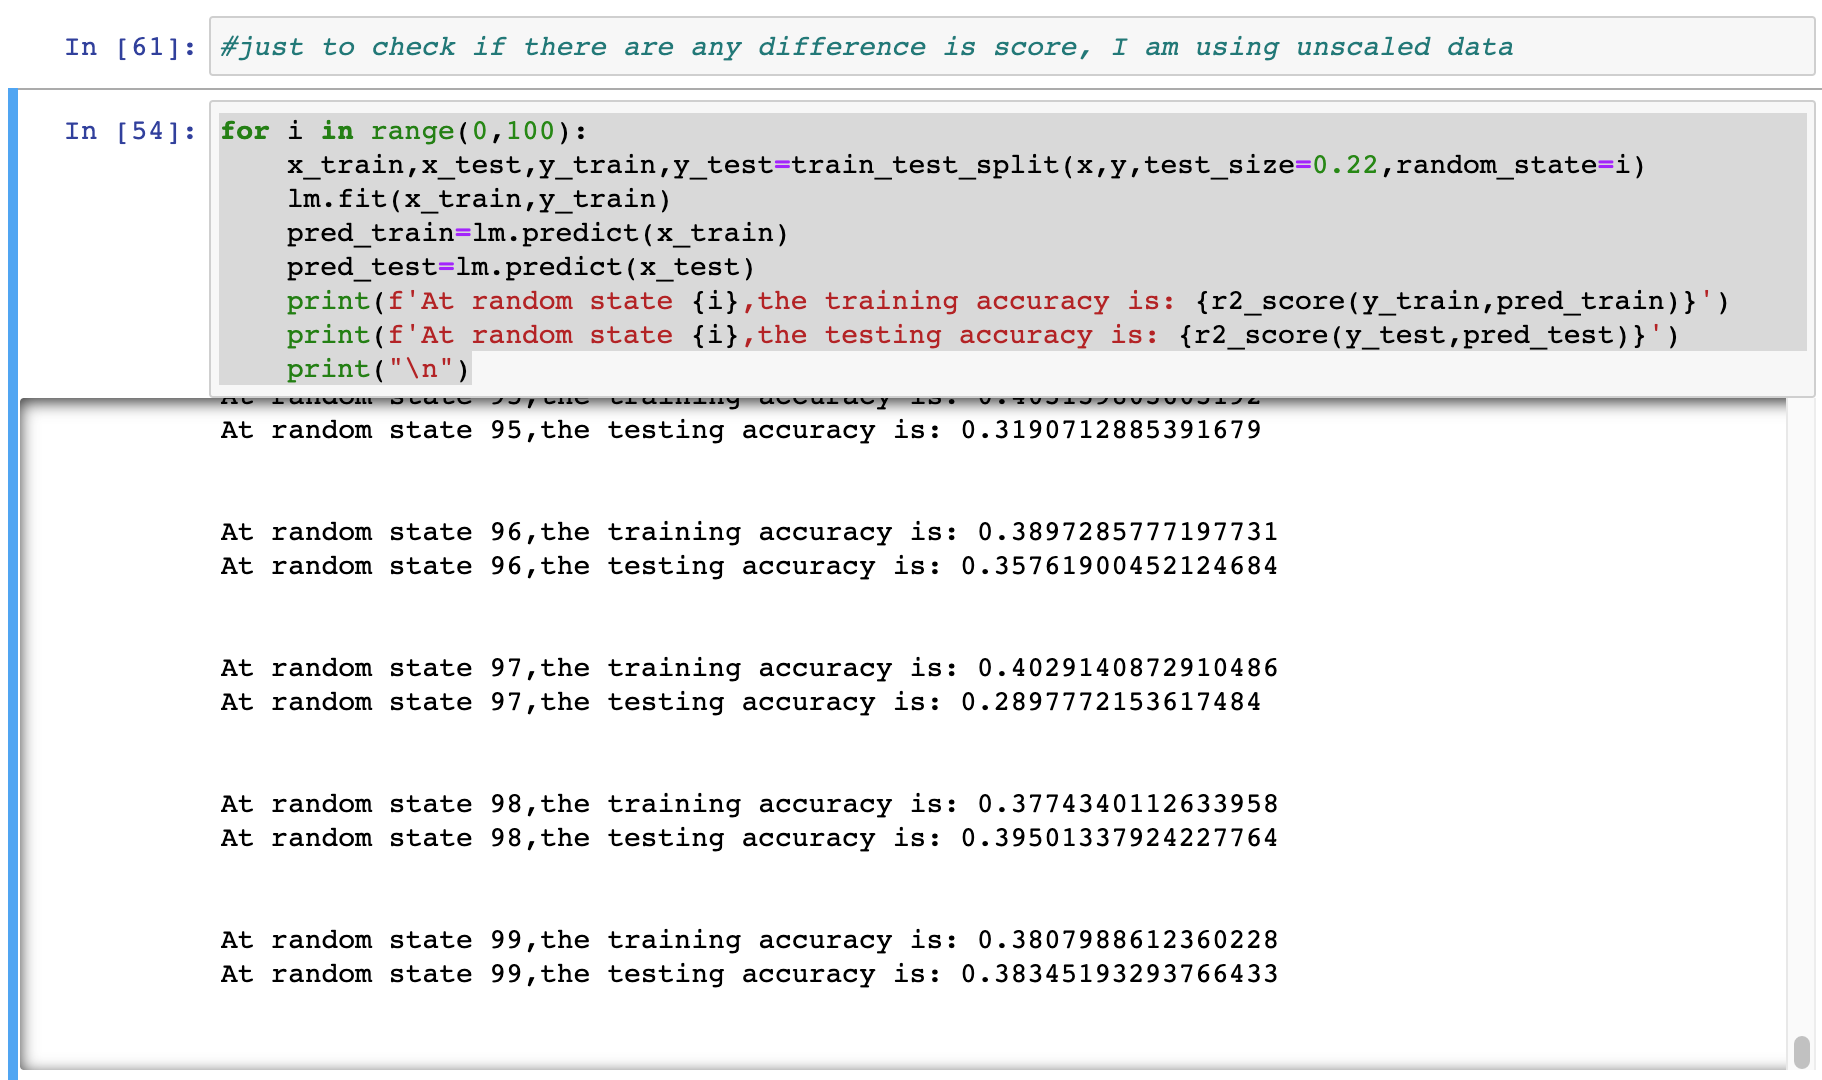

attaching the screenshot of the code

# Dropping the Sex column

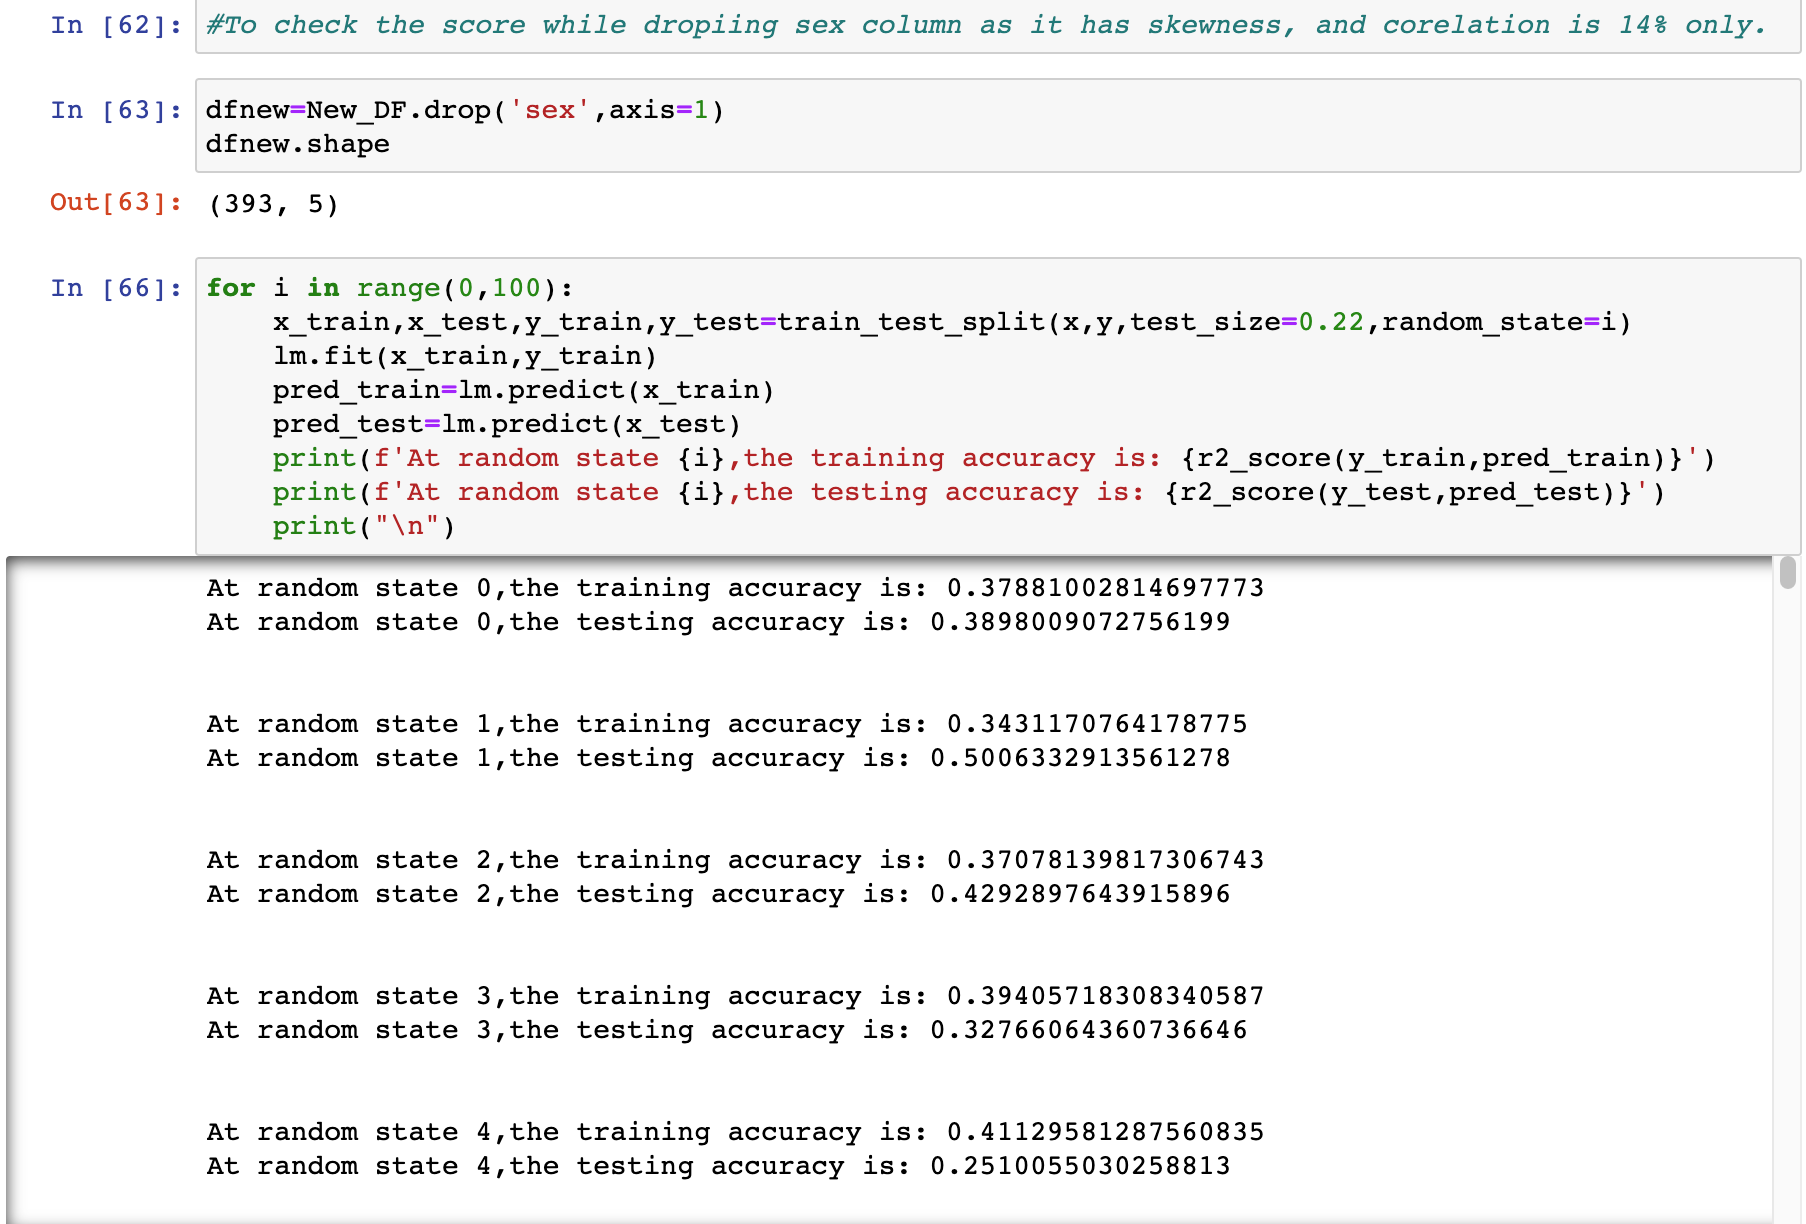

# In all the 3 models the maximum r2 score is 50% at random state 1. so we can use that and do cross validation.

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=1)
lm.fit(x_train,y_train)

LinearRegression()

In [47]:
pred_test=lm.predict(x_test)

In [48]:
print(r2_score(y_test,pred_test))

0.5008726385816057


# Cross Validation of the model

In [49]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.13705779 0.50869076 0.35868329 0.27039898 0.27128512]
0.3092231873835475
0.12232837253927538


In [50]:
#at cv=2 we get 50% cv score.

In [51]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))

print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,pred_test)))

error:
Mean absolute error: 0.11875668816429509
Mean squared error: 0.020833232060958325
Root Mean squared Error: 0.14433721647918227


In [52]:
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = pred_test
base

,actual,predictions
81,0.593981,0.453763
167,0.844439,0.492435
370,0.311047,0.414934
119,0.393386,0.329809
180,0.288646,0.193454
...,...,...
311,0.291047,0.389349
350,0.548564,0.453763
95,0.258625,0.249138
332,0.640527,0.469323


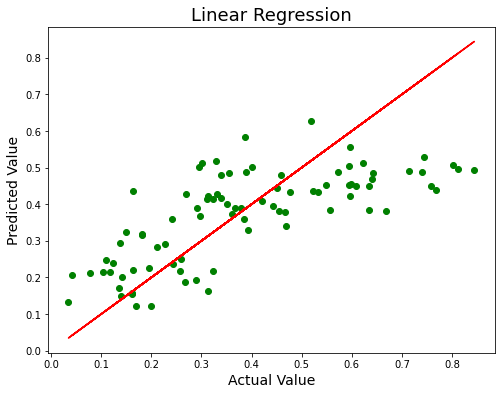

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# We are getting model accuracy of 50.08% and cross validation of 50.8% which shows our model is working only moderately.

# Regularization

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

ls=Lasso() 
parameters={'alpha':[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}

clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [57]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)

ls.score(x_train,y_train)

pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.5018082239692507

# Hence,

R2_score from Linear Regression: 50.08%
    
Cross Val Score: 50.86%
    
Lasso score: 50.18%